## Codio Activity 2.4: Measures of Center and Spread with `pandas`

Measures of central tendency for datasets are typically mean, median, mode, variance, and standard deviation. We will explore mode in later modules. This assignment focuses on using pandas to compute numerical summaries of data. You will load in a dataset and compute the mean, median, variance, and standard deviation of numeric features in the data. You will also examine the spread of the data using quartiles and the interquartile range, also identifying outliers using the  1.5×𝐼𝑄𝑅  rule.


## Index:

- [Problem 1](#Problem-1:-Load-the-Data)
- [Problem 2](#Problem-2:-Base-Salary-Distribution-Mean)
- [Problem 3](#Problem-3:-Base-Salary-Distribution-Median)
- [Problem 4](#Problem-4:-Determining-Quartiles)
- [Problem 5](#Problem-5:-Interquartile-Range)
- [Problem 6](#Problem-6:-Rule-for-Outliers)
- [Problem 7](#Problem-7:-Dropping-Outliers)
- [Problem 8](#Finding-the-Mean-with-no-Outliers)
- [Problem 9]()
- [Problem 10](#Standard-Deviation-with-`numpy`)
- [Problem 11](#Standard-Deviation-with-`pandas`)
- [Problem 12]()
- [Problem 13](#Measure-of-Center)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### The Data


![](images/payroll.png)
The dataset for this assignment comes from New York City's Open Data, and contains information about the citywide payroll data.  Below, you are to load the data from a `.csv` file.  

### Problem 1:  Load the Data

Below, load the data file located in the `data` folder named `nyc_salaries.csv`.  Assign your DataFrame to `nyc_salary_data`.

In [2]:
nyc_salary_data = pd.read_csv("data/nyc_salaries.csv")
nyc_salary_data.head()

,fiscal_year,payroll_number,agency_name,last_name,first_name,agency_start_date,work_location_borough,title_description,leave_status_as_of_july_31,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay,mid_init
0,2020,17,OFFICE OF EMERGENCY MANAGEMENT,BEREZIN,MIKHAIL,2015-08-10T00:00:00.000,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,NaN
1,2020,17,OFFICE OF EMERGENCY MANAGEMENT,GEAGER,VERONICA,2016-09-12T00:00:00.000,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,M
2,2020,17,OFFICE OF EMERGENCY MANAGEMENT,RAMANI,SHRADDHA,2016-02-22T00:00:00.000,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,NaN
3,2020,17,OFFICE OF EMERGENCY MANAGEMENT,ROTTA,JONATHAN,2013-09-16T00:00:00.000,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,D
4,2020,17,OFFICE OF EMERGENCY MANAGEMENT,WILSON II,ROBERT,2018-04-30T00:00:00.000,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.0,per Annum,1820.0,84698.21,0.0,0.0,0.0,P


### Examine the Data

Now that the data is loaded, information about the datatypes and missing values as well as a quick look at the first five rows of the data can be retrieved using the `.info()` and `.head()` methods.

In [3]:
nyc_salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590210 entries, 0 to 590209
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   fiscal_year                 590210 non-null  int64  
 1   payroll_number              590210 non-null  int64  
 2   agency_name                 590210 non-null  object 
 3   last_name                   589838 non-null  object 
 4   first_name                  589835 non-null  object 
 5   agency_start_date           590147 non-null  object 
 6   work_location_borough       590207 non-null  object 
 7   title_description           590204 non-null  object 
 8   leave_status_as_of_july_31  590210 non-null  object 
 9   base_salary                 590210 non-null  float64
 10  pay_basis                   590210 non-null  object 
 11  regular_hours               590210 non-null  float64
 12  regular_gross_paid          590210 non-null  float64
 13  ot_hours      

### Problem 2: Base Salary Distribution Mean

Use pandas to determine the mean of the `base_salary` column.  Assign your answer to the variable `ans_2` below.

In [4]:
ans_2 = nyc_salary_data[['base_salary']].mean()
ans_2

base_salary    46719.464393
dtype: float64

array([[<Axes: title={'center': 'base_salary'}>]], dtype=object)

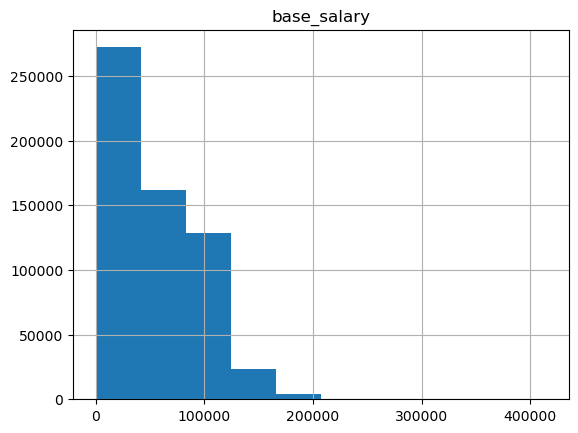

In [5]:
nyc_salary_data[['base_salary']].hist()

### Problem 3: Base Salary Distribution Median

Use the pandas `.median()` method to find the median of the `base_salary` column. Assign your answer to the variable `ans_3` below.

In [6]:
ans_3 = nyc_salary_data[['base_salary']].median()
ans_3

base_salary    44930.0
dtype: float64

### Problem 4: Determining Quartiles

The first quartile in our data is found by arranging the data from least to greatest and determining the median of the lower half of the data.  

The third quartile is the median of the upper half of the data.  

Pandas has a `.quantile()` method that accepts an argument as a single value or list of values of quantiles to compute.  

- Use the `.quantile()` method  with argument equal to `.25` to determine the first quartile of the `base_salary` column. Assign your answer to the variable `first_quartile`.
- Use the `.quantile()` method  with argument equal to `.75` to determine the third quartile of the `base_salary` column. Assign your answer to the variable `third_quartile`.


In [7]:
nyc_salary_data[['base_salary']].describe()

,base_salary
count,590210.000000
mean,46719.464393
std,45027.001693
min,1.000000
25%,33.180000
50%,44930.000000
75%,85292.000000
max,414707.000000


In [9]:
nyc_salary_data[['base_salary']].quantile(.25)

base_salary    33.18
Name: 0.25, dtype: float64

In [8]:
nyc_salary_data[['base_salary']].quantile(.5)

base_salary    44930.0
Name: 0.5, dtype: float64

In [18]:
nyc_salary_data[['base_salary']].quantile(.75)

base_salary    85292.0
Name: 0.75, dtype: float64

In [19]:
nyc_salary_data[['base_salary']].quantile(.908)

base_salary    108150.0
Name: 0.908, dtype: float64

In [20]:
nyc_salary_data[['base_salary']].quantile(.95)

base_salary    121986.0
Name: 0.95, dtype: float64

<Axes: >

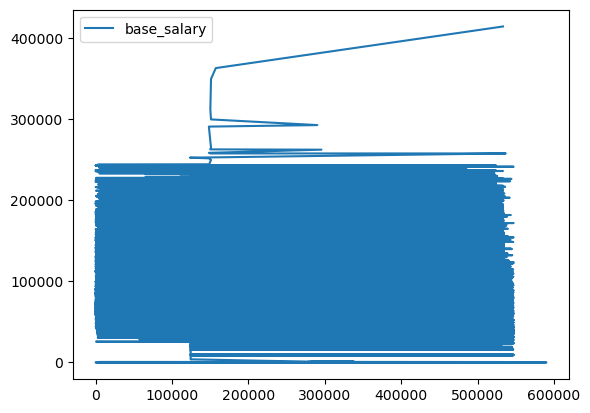

In [12]:
nyc_salary_data[['base_salary']].sort_values('base_salary').plot()

<Axes: >

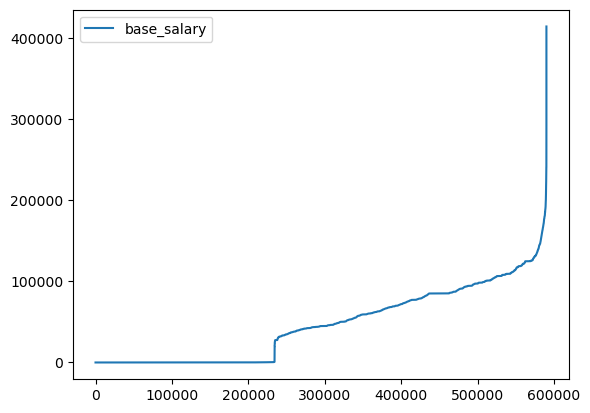

In [16]:
nyc_salary_data[['base_salary']].sort_values('base_salary').reset_index().plot(y='base_salary')


In [17]:
nyc_salary_data.shape

(590210, 17)

<Axes: >

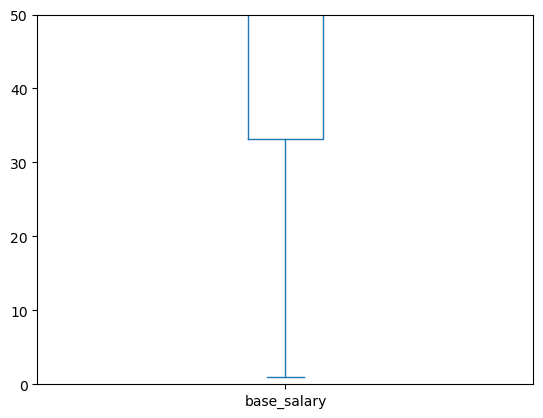

In [25]:
nyc_salary_data[['base_salary']].plot(kind = 'box', showmeans = True, ylim=(0, 50))

<Axes: >

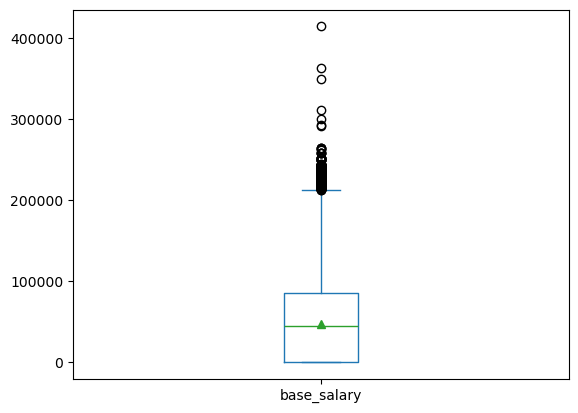

In [26]:
nyc_salary_data[['base_salary']].plot(kind = 'box', showmeans = True)

### Problem 5: Interquartile Range

The Interquartile Range (IQR) is the difference between the third and first quartile:

$$\text{IQR} = Q_3 - Q_1$$


Use your work from Problem 4 to determine the IQR for the `base_salary` column and assign it to the `iqr` variable below.

In [28]:
iqr = nyc_salary_data[['base_salary']].quantile(0.75) - nyc_salary_data[['base_salary']].quantile(0.25)
iqr

base_salary    85258.82
dtype: float64

### Problem 6: Rule for Outliers

We can use the IQR to determine boundaries for outliers. As a rule of thumb, any values greater than the third quartile plus $1.5 \times IQR$ or any values that are less than the first quartile by $1.5 \times IQR$  are considered outliers.  

Calculate the lower and upper boundaries for outliers for the `base_salary` column using the IQR rule above.

Assign your solutions to the variables `lower` and `upper` below.

In [37]:
lower = nyc_salary_data['base_salary'].quantile(0.25) - 1.5*iqr
lower

base_salary   -127855.05
dtype: float64

In [38]:
upper = nyc_salary_data['base_salary'].quantile(0.75) + 1.5*iqr
upper

base_salary    213180.23
dtype: float64

### Problem 7: Dropping Outliers

With the upper and lower boundaries in place, drop the outliers from the dataset.  

Use the pandas `loc[]` method to limit the data in the `base_salary` column based on the outliers bounds using the $1.5 \times IQR$ rule.  

Assign the resulting DataFrame to `salaries_no_outlier` below.

In [39]:
type(lower)

pandas.core.series.Series

In [40]:
lower.index


Index(['base_salary'], dtype='object')

In [45]:
# Important: to get Series inside number 
lower.item()

-127855.05000000002

In [43]:
salaries_no_outlier = nyc_salary_data.loc[(nyc_salary_data['base_salary']> lower.item()) & (nyc_salary_data['base_salary']< upper.item())]
salaries_no_outlier

,fiscal_year,payroll_number,agency_name,last_name,first_name,agency_start_date,work_location_borough,title_description,leave_status_as_of_july_31,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay,mid_init
0,2020,17,OFFICE OF EMERGENCY MANAGEMENT,BEREZIN,MIKHAIL,2015-08-10T00:00:00.000,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820.0,84698.21,0.0,0.0,0.00,NaN
1,2020,17,OFFICE OF EMERGENCY MANAGEMENT,GEAGER,VERONICA,2016-09-12T00:00:00.000,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820.0,84698.21,0.0,0.0,0.00,M
2,2020,17,OFFICE OF EMERGENCY MANAGEMENT,RAMANI,SHRADDHA,2016-02-22T00:00:00.000,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820.0,84698.21,0.0,0.0,0.00,NaN
3,2020,17,OFFICE OF EMERGENCY MANAGEMENT,ROTTA,JONATHAN,2013-09-16T00:00:00.000,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820.0,84698.21,0.0,0.0,0.00,D
4,2020,17,OFFICE OF EMERGENCY MANAGEMENT,WILSON II,ROBERT,2018-04-30T00:00:00.000,BROOKLYN,EMERGENCY PREPAREDNESS MANAGER,ACTIVE,86005.00,per Annum,1820.0,84698.21,0.0,0.0,0.00,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590205,2020,747,DEPT OF ED PER SESSION TEACHER,RUGG,ISAAC,2016-11-21T00:00:00.000,MANHATTAN,TEACHER- PER SESSION,CEASED,33.18,per Day,0.0,0.00,0.0,0.0,0.62,NaN
590206,2020,747,DEPT OF ED PER SESSION TEACHER,SMITH,MICHAEL,1993-03-04T00:00:00.000,MANHATTAN,TEACHER- PER SESSION,CEASED,33.18,per Day,0.0,0.00,0.0,0.0,0.62,A
590207,2020,747,DEPT OF ED PER SESSION TEACHER,KOWALCZYK,MEGAN,2014-12-05T00:00:00.000,MANHATTAN,TEACHER- PER SESSION,CEASED,33.18,per Day,0.0,0.00,0.0,0.0,0.61,NaN
590208,2020,747,DEPT OF ED PER SESSION TEACHER,MUGGEO,DAWN,1997-09-02T00:00:00.000,MANHATTAN,TEACHER- PER SESSION,CEASED,33.18,per Day,0.0,0.00,0.0,0.0,0.61,M


In [47]:
list = 15
list('abc')

TypeError: 'int' object is not callable

In [48]:
list()

TypeError: 'int' object is not callable

In [49]:
list = []

In [50]:
list

[]

In [51]:
list()

TypeError: 'list' object is not callable

In [54]:
# Important: if you use the keyword by mistake, you can delete the variable
del list

NameError: name 'list' is not defined

In [55]:
list('bbc')

['b', 'b', 'c']

### Problem 8: Finding the Mean with no Outliers

Now that the outliers have been removed, use the function `mean()` on the column `base_salary` of `salaries_no_outlier` to find the mean of your data without outliers.  

Assign your answer to `mean_no_outliers` below.

In [56]:
mean_no_outliers = salaries_no_outlier['base_salary'].mean()
mean_no_outliers

np.float64(46568.13546421399)

### Problem 9: Finding the Median with no Outliers

Use the function `median()` on the column `base_salary` of `salaries_no_outlier` to find the median of your data without outliers.  

Assign your solution to the variable `median_no_outliers` below.

In [57]:
median_no_outliers = salaries_no_outlier['base_salary'].median()
median_no_outliers

44930.0

### Problem 10: Standard Deviation with `numpy`

An alternative measure for the spread of a dataset to the IQR is the **standard deviation**.  

Both pandas and NumPy have functions for computing the standard deviation, however they have different assumptions about the data.  

- Use the  `np.std()` method to determine the standard deviation of the `base_salary` column of `nyc_salary_data` to compute the standard deviation on the entire dataset.  Assign your result to the variable `std_numpy_outliers` .

- Use the  `np.std()` method to determine the standard deviation of the `base_salary` column of `salaries_no_outlier` to compute the standard deviation on the entire dataset.  Assign your result to the variable `std_numpy_no_outliers` .

In [58]:
std_numpy_outliers = np.std(nyc_salary_data['base_salary'])
std_numpy_outliers

45026.96354845374

In [59]:
std_numpy_no_outliers = np.std(salaries_no_outlier['base_salary'])
std_numpy_no_outliers

44730.382624481594

### Problem 11: Standard Deviation with `pandas`

In the next exercise, you will use pandas to determine the standard deviation of the `base_salary` column.  

- Use the  `std()` pandas method to determine the standard deviation of the `base_salary` column of `nyc_salary_data` to compute the standard deviation on the entire dataset.  Assign your result to the variable `std_pandas_outliers` .

- Use the  `std()` pandas method to determine the standard deviation of the `base_salary` column of `salaries_no_outlier` to compute the standard deviation on the entire dataset.  Assign your result to the variable `std_pandas_no_outliers` .


In [60]:
std_pandas_outliers = nyc_salary_data['base_salary'].std()
std_pandas_outliers

45027.00169336892

In [62]:
std_pandas_no_outliers = salaries_no_outlier['base_salary'].std()
std_pandas_no_outliers

44730.42054911762

### Why are these different?

Pandas and NumPy make different assumptions about the data, which is why we receive slightly different results.  This involves the default degree of freedom argument in the functions.  From the numpy docs we have:

```
ddof: int, optional
Means Delta Degrees of Freedom. The divisor used in calculations is N - ddof, where N represents the number of elements. By default ddof is zero.
```

and from pandas we find:

```
ddof: int, default 1
Delta Degrees of Freedom. The divisor used in calculations is N - ddof, where N represents the number of elements.
```

The main reason for the different assumptions is motivated by the fact that all the deviations from the mean will add to zero.  This means we would always know the the last deviation if we know the previous $n-1$.  Only $n-1$ are able to vary freely so the average is determined by dividing the total by $n-1$.  In practice the values won't differ greatly, it is important to recognize that there are some different assumptions however.  

### Problem 12: Calculating the Mode

Determine the mode of the `nyc_salary_data` DataFrame and assign the result to `df_mode`.

The pandas mode() function is a method used to find the most frequently occurring value(s) in a pandas Series or DataFrame. It is a crucial tool for statistical analysis in Python, allowing for efficient identification of the most common values in a dataset. 

In [71]:
# pandas mode shows the most frequent item for each column
df_mode = nyc_salary_data.mode()
df_mode

,fiscal_year,payroll_number,agency_name,last_name,first_name,agency_start_date,work_location_borough,title_description,leave_status_as_of_july_31,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay,mid_init
0,2020,742,DEPT OF ED PEDAGOGICAL,RODRIGUEZ,MICHAEL,2010-01-01T00:00:00.000,MANHATTAN,TEACHER- PER SESSION,ACTIVE,33.18,per Annum,0.0,0.0,0.0,0.0,0.0,A


In [72]:
nyc_salary_data.value_counts("first_name")

first_name
MICHAEL     8626
JOHN        5389
JOSEPH      4801
MARIA       4591
JENNIFER    4475
            ... 
KARELY         1
KARELYS        1
KAREME         1
KARESA         1
ZZZY           1
Name: count, Length: 61465, dtype: int64

In [66]:
nyc_salary_data[nyc_salary_data.duplicated(keep=False)]

,fiscal_year,payroll_number,agency_name,last_name,first_name,agency_start_date,work_location_borough,title_description,leave_status_as_of_july_31,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay,mid_init


In [68]:
from scipy.stats import mode

In [70]:
mode([1,2,2,3,4,4,4])

ModeResult(mode=np.int64(4), count=np.int64(3))

### A Second Small Example

The data below relates to salmon smolts (young salmon) and the reflectance of their skin as a measure for readiness for migration.

In [74]:
smolt = pd.read_csv('data/smolts.csv',index_col = 0)
smolt.head()

,Reflectance
ID,
1,57.62747
2,54.83248
3,63.44216
4,57.01707
5,54.71893


### Problem 13: Measure of Center

Determine the mean and median of the `Reflectance` column, save these to the variable `smolt_mean` and `smolt_median` below.  

In [75]:
smolt_mean = smolt.mean()
smolt_mean

Reflectance    50.892072
dtype: float64

In [76]:
smolt_median = smolt.median()
smolt_median

Reflectance    49.51086
dtype: float64